In [76]:
# read in each file
%run ../lib/stock_stats.py

# read in all downloaded files
from os import listdir
from os.path import isfile, join
import ntpath

DATA_DIR = '../data/'
NUM_STOCKS = 20
data_files = [DATA_DIR + f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f))][0:NUM_STOCKS]

stats = []
for file in data_files:
    with open(file) as f:
        content = [x.strip().split(',') for x in f.readlines()][1:]
        ticker = content[0][0]
        parsed = [(r[1], r[2]) for r in content]
        stats.append((ticker, StockStats(parsed)))
stats

[('CSCO', <__main__.StockStats at 0x110bc5048>),
 ('UAL', <__main__.StockStats at 0x117113048>),
 ('TROW', <__main__.StockStats at 0x110bc5eb8>),
 ('ISRG', <__main__.StockStats at 0x117113470>),
 ('PRGO', <__main__.StockStats at 0x110bccc88>),
 ('LUK', <__main__.StockStats at 0x110d5de48>),
 ('DVN', <__main__.StockStats at 0x110bcecf8>),
 ('MRO', <__main__.StockStats at 0x11058db00>),
 ('BA', <__main__.StockStats at 0x110bd6cf8>),
 ('VRTX', <__main__.StockStats at 0x116b4f518>),
 ('BRK.B', <__main__.StockStats at 0x110bddef0>),
 ('GILD', <__main__.StockStats at 0x116b4f6a0>),
 ('NLSN', <__main__.StockStats at 0x110bee438>),
 ('EQIX', <__main__.StockStats at 0x116b4fe80>),
 ('TIF', <__main__.StockStats at 0x110bf12e8>),
 ('V', <__main__.StockStats at 0x116b852b0>),
 ('QRVO', <__main__.StockStats at 0x110bf5518>),
 ('A', <__main__.StockStats at 0x116b85780>),
 ('FOX', <__main__.StockStats at 0x110bcdc50>),
 ('MO', <__main__.StockStats at 0x116b9a7f0>)]

In [94]:
import numpy as np
import pandas as pd
from dateutil.parser import parse

# process closing values of each
min_date = max([parse(s[1].earlierst_value()) for s in stats])
min_date_s = min_date.strftime("%Y-%m-%d")
all_vals = [(s[0],s[1].vals) for s in stats]

vals_filtered = []

for v in all_vals:
    ticker = v[0]
    vals = v[1]
    vals_filtered.append((ticker, [a[1] for a in vals if a[0] >= min_date_s]))

vals_final = [np.array(v[1]) for v in vals_filtered]
vals_typed = [f.astype(np.float) for f in vals_final]
corr_array = np.corrcoef(vals_typed)

tickers = np.array([s[0] for s in stats])
corr=pd.DataFrame(data=corr_array, index=tickers, columns=tickers)
corr

,CSCO,UAL,TROW,ISRG,PRGO,LUK,DVN,MRO,BA,VRTX,BRK.B,GILD,NLSN,EQIX,TIF,V,QRVO,A,FOX,MO
CSCO,1.000000,0.459761,0.833864,0.912671,-0.573239,0.558417,-0.161402,-0.024217,0.924191,0.601855,0.918730,-0.549334,-0.740382,0.638963,0.678408,0.916144,0.564534,0.870376,0.566885,0.345956
UAL,0.459761,1.000000,0.334815,0.412875,-0.346706,0.720569,0.103618,0.146205,0.467294,0.332594,0.579422,-0.433151,-0.688573,0.308408,0.666594,0.410343,0.490196,0.482196,0.331441,0.360675
TROW,0.833864,0.334815,1.000000,0.799768,-0.209759,0.501380,0.000913,0.198130,0.912159,0.773354,0.815890,-0.177111,-0.741694,0.381677,0.733000,0.792827,0.581306,0.742811,0.735443,-0.032257
ISRG,0.912671,0.412875,0.799768,1.000000,-0.680304,0.520769,-0.387263,-0.265584,0.946017,0.653674,0.938728,-0.646580,-0.761918,0.820476,0.621729,0.983766,0.502225,0.965318,0.341523,0.444941
PRGO,-0.573239,-0.346706,-0.209759,-0.680304,1.000000,-0.246673,0.541835,0.574326,-0.484572,-0.007645,-0.645599,0.943221,0.350271,-0.864012,-0.114611,-0.668926,-0.095571,-0.695464,0.166289,-0.840946
LUK,0.558417,0.720569,0.501380,0.520769,-0.246673,1.000000,0.329856,0.346019,0.598059,0.591150,0.699673,-0.294003,-0.716651,0.405385,0.846816,0.502959,0.778677,0.640167,0.435314,0.251906
DVN,-0.161402,0.103618,0.000913,-0.387263,0.541835,0.329856,1.000000,0.953083,-0.221740,0.014805,-0.187702,0.476828,0.068709,-0.559777,0.237015,-0.410860,0.398404,-0.303774,0.397215,-0.509567
MRO,-0.024217,0.146205,0.198130,-0.265584,0.574326,0.346019,0.953083,1.000000,-0.062249,0.168700,-0.088977,0.507545,-0.075250,-0.574592,0.362616,-0.292436,0.479987,-0.223151,0.593518,-0.598983
BA,0.924191,0.467294,0.912159,0.946017,-0.484572,0.598059,-0.221740,-0.062249,1.000000,0.780019,0.940547,-0.454463,-0.849131,0.653877,0.756989,0.950835,0.585213,0.913819,0.551146,0.256561
VRTX,0.601855,0.332594,0.773354,0.653674,-0.007645,0.591150,0.014805,0.168700,0.780019,1.000000,0.639490,0.024657,-0.722887,0.339665,0.779748,0.659850,0.660309,0.663691,0.515789,-0.126782


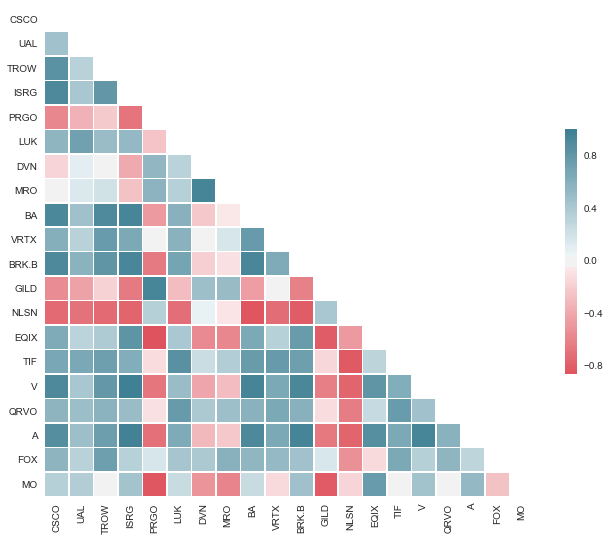

In [98]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})